In [1]:
# default_exp onehot

In [2]:
# all_func

In [3]:
#hide

from nbdev.showdoc import *

# Onehot Embeddings

> Steps to create baseline results with ML models on one hot encoded data.

In [4]:
# export

from peptide.imports import *
from peptide.basics import *
from peptide.utils import *
from peptide.learn import Learner
from peptide.data import (
    ProteinDataset,
    ACPDataset,
    AMPDataset,
    DNABindDataset,
)

## Load data

In [5]:
acp_data = ACPDataset(DATA_STORE)
amp_data = AMPDataset(DATA_STORE)
dna_data = DNABindDataset(DATA_STORE)

## Anti Cancer Peptide Dataset (ACP) 

### ACP - One Hot Encoding and Dimensionality Reduction with PCA

Building baseline models for the ACP dataset with one hot encoding and evaluating prediction on test set with and without dimensionality reduction.

In [6]:
ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

X_train = ohe.fit_transform(acp_data.X_train)
y_train = acp_data.y_train
X_test = ohe.transform(acp_data.X_test)
y_test = acp_data.y_test
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1378, 1005), (1378,), (344, 1005), (344,))

In [7]:
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train)
print(f'X_train_pca.shape: {X_train_pca.shape}')
print(
    f"Explained variance ratio of the first 10 principal components:\n{pca.explained_variance_ratio_[:10]}"
)

X_train_pca.shape: (1378, 50)
Explained variance ratio of the first 10 principal components:
[0.1410507  0.0416239  0.02109974 0.01722044 0.01636225 0.01540608
 0.01202852 0.01169151 0.01045003 0.00951477]


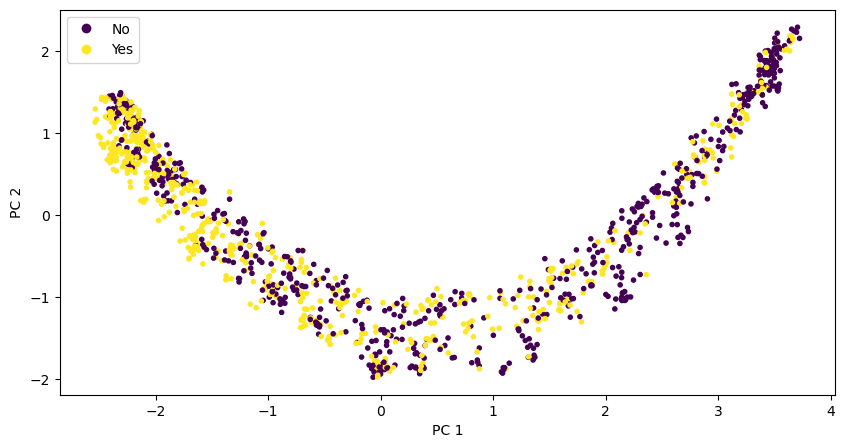

In [8]:
visualize_2pcs(X_train_pca, y_train)

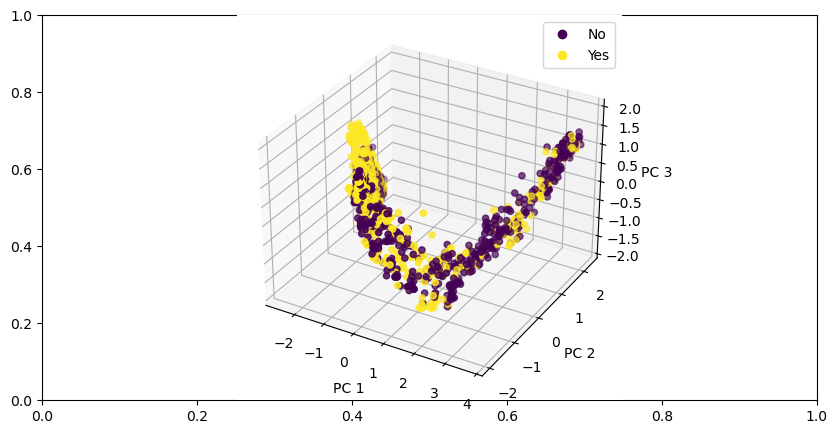

In [9]:
visualize_3pcs(X_train_pca, y_train)

Evaluation on full data

In [10]:
train_predict(X_train, y_train, X_test, y_test)

,acc,recall,precision,f1
lr,0.747093,0.790698,0.727273,0.757660
svc,0.697674,0.720930,0.688889,0.704545
xgb,0.755814,0.819767,0.726804,0.770492


Evaluation on reduced data

In [11]:
X_test_pca = pca.transform(X_test)
train_predict(X_train_pca, y_train, X_test_pca, y_test)

,acc,recall,precision,f1
lr,0.645349,0.703488,0.630208,0.664835
svc,0.639535,0.709302,0.622449,0.663043
xgb,0.720930,0.755814,0.706522,0.730337


### ACP - Get Data and Learners

Creating data and learner objects to perform grid search.

In [12]:
X_train, y_train = acp_data.X_train, acp_data.y_train 
X_test, y_test = acp_data.X_test, acp_data.y_test

acp_learner = Learner(X_train, y_train, X_test, y_test, ohe=True, pca=False)
acp_learner_pca = Learner(X_train, y_train, X_test, y_test, ohe=True, pca=True)

### ACP - Grid Search (Supervised Learning)

In [13]:
acp_learner.pipeline.steps

[('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False)),
 ('classifier', 'passthrough')]

In [14]:
acp_learner_pca.pipeline.steps

[('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False)),
 ('pca', PCA(n_components=50)),
 ('classifier', 'passthrough')]

In [15]:
#hide_output

_, _ = acp_learner.train()

Starting grid search for LogisticRegression
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Starting grid search for LinearSVC
Fitting 5 folds for each of 30 candidates, totalling 150 fits


/home/vinod/anaconda3/envs/peptide2/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide2/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide2/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide2/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide2/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide2

Starting grid search for XGBClassifier
Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [16]:
#hide_output

_, _ = acp_learner_pca.train()

Starting grid search for LogisticRegression
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Starting grid search for LinearSVC
Fitting 5 folds for each of 30 candidates, totalling 150 fits


/home/vinod/anaconda3/envs/peptide2/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide2/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide2/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide2/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide2/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide2

Starting grid search for XGBClassifier
Fitting 5 folds for each of 32 candidates, totalling 160 fits


### ACP - Label Spreading (Semi-Supervised Learning)

In [17]:
acp_learner_pca.run_label_spreading()

              precision    recall  f1-score   support

           0       0.72      0.67      0.70       172
           1       0.69      0.74      0.72       172

    accuracy                           0.71       344
   macro avg       0.71      0.71      0.71       344
weighted avg       0.71      0.71      0.71       344



### ACP - Prediction Results

On full dataset.

In [18]:
acp_learner.predict()

,best_params,accuracy,recall,precision,f1
LogisticRegression,{'classifier': LogisticRegression(max_iter=100...,0.752907,0.80814,0.727749,0.76584
LinearSVC,"{'classifier': LinearSVC(C=0.01, max_iter=1000...",0.723837,0.77907,0.701571,0.738292
XGBClassifier,"{'classifier': XGBClassifier(base_score=None, ...",0.755814,0.813953,0.729167,0.769231
LabelSpreading,NaN,NaN,NaN,NaN,NaN


On dim reduced dataset.

In [19]:
acp_learner_pca.predict()

,best_params,accuracy,recall,precision,f1
LogisticRegression,"{'classifier': LogisticRegression(C=0.1, max_i...",0.645349,0.709302,0.628866,0.666667
LinearSVC,"{'classifier': LinearSVC(max_iter=10000), 'cla...",0.65407,0.72093,0.635897,0.675749
XGBClassifier,"{'classifier': XGBClassifier(base_score=None, ...",0.741279,0.790698,0.719577,0.753463
LabelSpreading,"{'alpha': 0.01, 'gamma': 20, 'kernel': 'knn', ...",0.706395,0.738372,0.693989,0.715493


Save results.

In [21]:
acp_learner.predict_results.to_csv(f'{EXPERIMENT_STORE}/acp_learner.csv')
acp_learner_pca.predict_results.to_csv(f'{EXPERIMENT_STORE}/acp_learner_pca.csv')

### ACP - KMeans Clustering (Unsupervised Learning)

n_clusters: 2 -- avg silhouette score: 0.24189641844512438
n_clusters: 3 -- avg silhouette score: 0.1754194089145166
n_clusters: 4 -- avg silhouette score: 0.15634690234709434
n_clusters: 5 -- avg silhouette score: 0.13024175360754556
n_clusters: 6 -- avg silhouette score: 0.13751160155081027
n_clusters: 7 -- avg silhouette score: 0.10776535589391373
n_clusters: 8 -- avg silhouette score: 0.11651354852857107
n_clusters: 9 -- avg silhouette score: 0.11954560000052203
n_clusters: 10 -- avg silhouette score: 0.12149742236104567


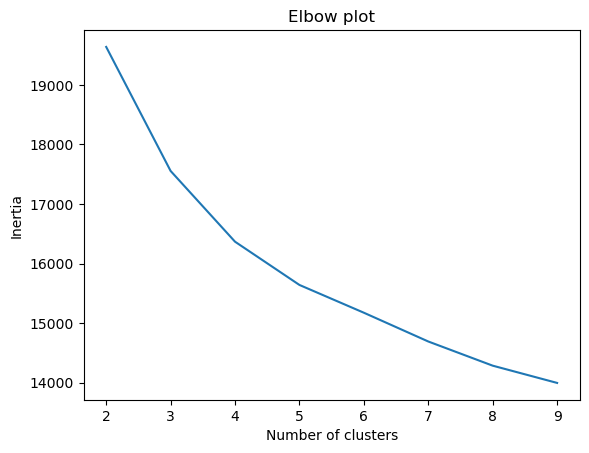

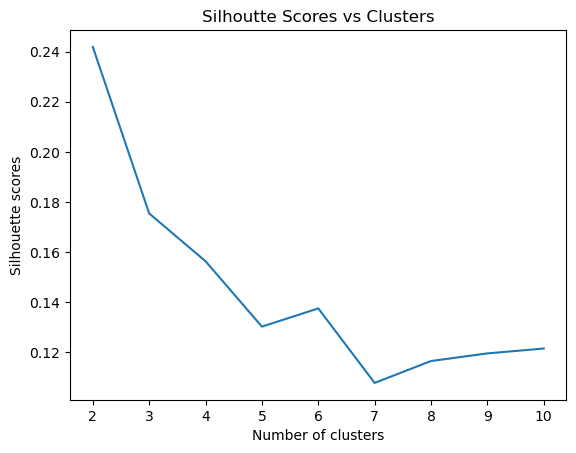

In [22]:
X_pca = acp_learner_pca.pick_k()

Cluster counts: Counter({1: 388, 4: 289, 6: 280, 5: 235, 3: 200, 0: 176, 2: 154})


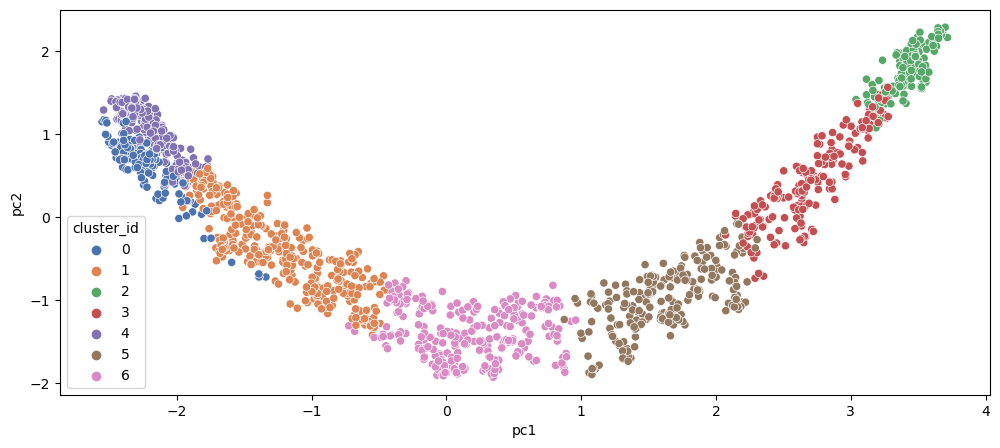

In [23]:
acp_learner_pca.analyze_clusters(X_pca, k=7)

## Antimicrobial Peptide (AMP) Dataset

In [24]:
amp_data.train.head(5)

,index,sequence,label,length
0,3,FFGRLKAVFRGARQGWKEHRY,1,21
1,4,DFGCARGMIFVCMRRCARMYPGSTGYCQGFRCMCDTMIPIRRPPFIMG,1,48
2,5,GRRKRKWLRRIGKGVKIIGGAALDHL,1,26
3,6,LLMRKLIKGYGYLFGKGKRKKR,1,22
4,7,LIDHLGAPRWAVDTILGAIAVGNLASWVLALVPGPGWAVKAGLATA...,1,61


In [25]:
amp_data.test.head(5)


,index,sequence,label,length
0,2629,SVVHQDVGGKDYTTKYGL,0,18
1,1102,FKFGSFIKRMWRSKLAKKLRAKGKELLRDYANRVLSPEEEAAAPAPYPA,1,49
2,946,GWFKKTFHKVSHAVKSGIHAGQRGCSALGF,1,30
3,118,GIFSSRKCKTVSKTFRGICTRNANC,1,25
4,326,FMGGLIKAATKIVPAAYCAITKKC,1,24


In [26]:
amp_data.train["length"].max(), amp_data.test["length"].max()


(183, 171)

In [27]:
amp_data.X_train.shape[1], amp_data.X_test.shape[1]


(150, 150)

### AMP - One Hot Encoding and Dimensionality Reduction

One Hot Encoding

In [28]:
amp_data.X_train.shape, amp_data.X_test.shape

((3234, 150), (808, 150))

In [29]:
ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

X_train = ohe.fit_transform(amp_data.X_train)
y_train = amp_data.y_train

In [30]:
X_test = ohe.transform(amp_data.X_test)
y_test = amp_data.y_test

In [31]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((3234, 2772), (3234,), (808, 2772), (808,))

Dimensionality Reduction - PCA

In [32]:
pca = PCA(n_components=50)

In [33]:
X_train_pca = pca.fit_transform(X_train)

In [34]:
X_train_pca.shape

(3234, 50)

In [35]:
print(
    f"Explained variance ratio of the first 10 principal components:\n{pca.explained_variance_ratio_[:10]}"
)


Explained variance ratio of the first 10 principal components:
[0.13843282 0.047556   0.02220828 0.01353615 0.00920877 0.00810649
 0.00658269 0.00641526 0.00495086 0.00445505]


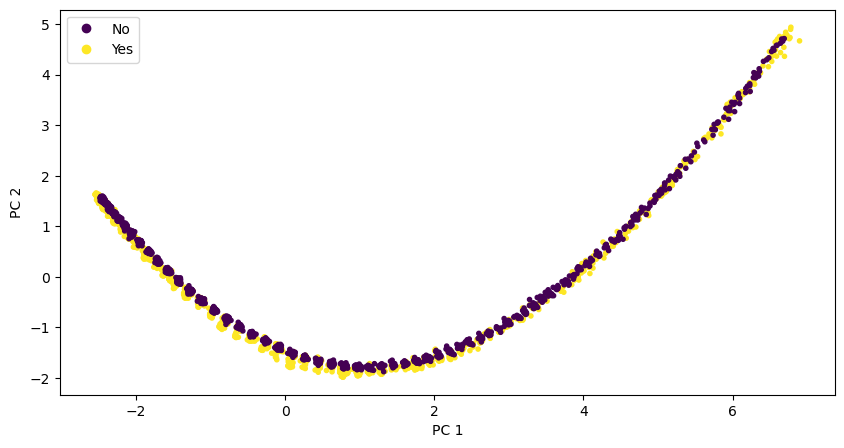

In [36]:
visualize_2pcs(X_train_pca, y_train)

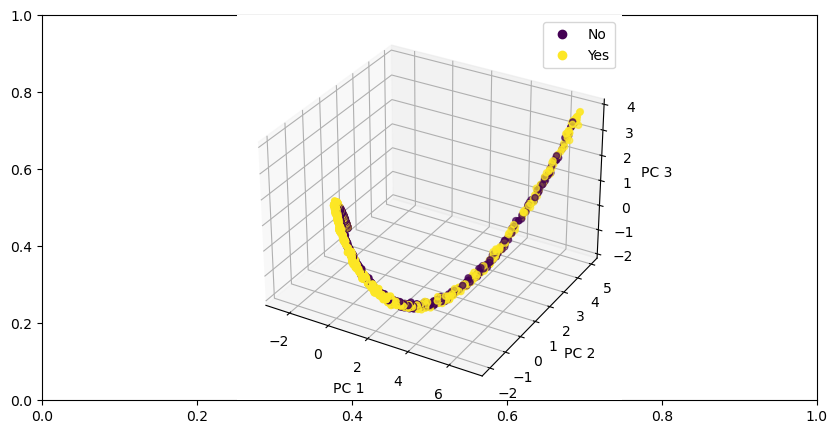

In [37]:
visualize_3pcs(X_train_pca, y_train)

#### AMP - Train Classifiers & Predict

On full data

In [38]:
train_predict(X_train, y_train, X_test, y_test)

,acc,recall,precision,f1
lr,0.861386,0.848866,0.866324,0.857506
svc,0.820545,0.813602,0.819797,0.816688
xgb,0.875000,0.846348,0.893617,0.869340


On Dim Reduced Data

In [39]:
X_test_pca = pca.transform(X_test)
train_predict(X_train_pca, y_train, X_test_pca, y_test)

,acc,recall,precision,f1
lr,0.832921,0.811083,0.842932,0.826701
svc,0.836634,0.813602,0.847769,0.830334
xgb,0.850248,0.780856,0.901163,0.836707


### AMP - Get Data and Learners

In [40]:
X_train, y_train = amp_data.X_train, amp_data.y_train 
X_test, y_test = amp_data.X_test, amp_data.y_test

amp_learner = Learner(X_train, y_train, X_test, y_test, ohe=True, pca=False)
amp_learner_pca = Learner(X_train, y_train, X_test, y_test, ohe=True, pca=True)

### AMP - Grid Search (Supervised Learning)

In [41]:
#hide_output

_, _ = amp_learner.train()

Starting grid search for LogisticRegression
Fitting 5 folds for each of 45 candidates, totalling 225 fits


/home/vinod/anaconda3/envs/peptide2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/vinod/anaconda3/envs/peptide2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

Starting grid search for LinearSVC
Fitting 5 folds for each of 30 candidates, totalling 150 fits


/home/vinod/anaconda3/envs/peptide2/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide2/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide2/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide2/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide2/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide2

Starting grid search for XGBClassifier
Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [42]:
#hide_output

_, _ = amp_learner_pca.train()

Starting grid search for LogisticRegression
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Starting grid search for LinearSVC
Fitting 5 folds for each of 30 candidates, totalling 150 fits


/home/vinod/anaconda3/envs/peptide2/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide2/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide2/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide2/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide2/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide2

Starting grid search for XGBClassifier
Fitting 5 folds for each of 32 candidates, totalling 160 fits


### AMP - Label Spreading (Semi-Supervised Learning)

In [43]:
amp_learner_pca.run_label_spreading()

              precision    recall  f1-score   support

           0       0.76      0.93      0.83       411
           1       0.90      0.69      0.78       397

    accuracy                           0.81       808
   macro avg       0.83      0.81      0.81       808
weighted avg       0.83      0.81      0.81       808



### AMP - Prediction Results

On full dataset.

In [44]:
amp_learner.predict()

,best_params,accuracy,recall,precision,f1
LogisticRegression,{'classifier': LogisticRegression(max_iter=100...,0.855198,0.823678,0.874332,0.848249
LinearSVC,"{'classifier': LinearSVC(C=0.1, loss='hinge', ...",0.871287,0.851385,0.882507,0.866667
XGBClassifier,"{'classifier': XGBClassifier(base_score=None, ...",0.884901,0.848866,0.910811,0.878748
LabelSpreading,NaN,NaN,NaN,NaN,NaN


On dim reduced dataset.

In [45]:
amp_learner_pca.predict()

,best_params,accuracy,recall,precision,f1
LogisticRegression,"{'classifier': LogisticRegression(C=10.0, max_...",0.830446,0.811083,0.838542,0.824584
LinearSVC,"{'classifier': LinearSVC(loss='hinge', max_ite...",0.839109,0.823678,0.844961,0.834184
XGBClassifier,"{'classifier': XGBClassifier(base_score=None, ...",0.85396,0.778338,0.911504,0.839674
LabelSpreading,"{'alpha': 0.01, 'gamma': 20, 'kernel': 'knn', ...",0.811881,0.690176,0.90429,0.782857


Save results.

In [52]:
amp_learner.predict_results.to_csv(f'{EXPERIMENT_STORE}/amp_learner.csv')
amp_learner_pca.predict_results.to_csv(f'{EXPERIMENT_STORE}/amp_learner_pca.csv')

### AMP - KMeans Clustering (Unsupervised Learning)

n_clusters: 2 -- avg silhouette score: 0.32884167609089565
n_clusters: 3 -- avg silhouette score: 0.2618390917985841
n_clusters: 4 -- avg silhouette score: 0.2245264908915046
n_clusters: 5 -- avg silhouette score: 0.21080081882417037
n_clusters: 6 -- avg silhouette score: 0.18946098992379776
n_clusters: 7 -- avg silhouette score: 0.1683534772217492
n_clusters: 8 -- avg silhouette score: 0.15051788981714395
n_clusters: 9 -- avg silhouette score: 0.15132507115815524
n_clusters: 10 -- avg silhouette score: 0.14377216425526113


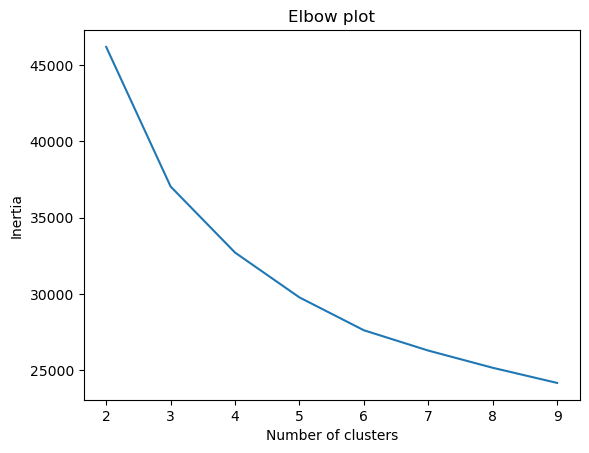

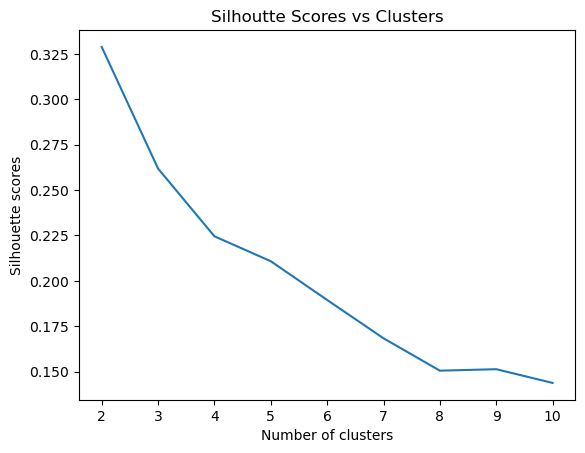

In [53]:
X_pca = amp_learner_pca.pick_k()

Cluster counts: Counter({0: 1200, 2: 984, 3: 837, 5: 564, 1: 299, 4: 158})


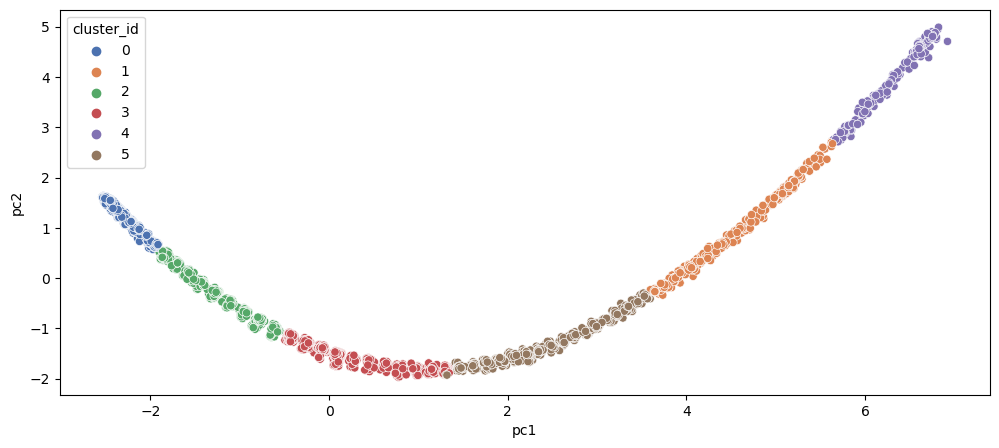

In [54]:
amp_learner_pca.analyze_clusters(X_pca, k=6)

## DNA Binding Dataset

### DNA - One Hot Encoding and Dimensionality Reduction

In [6]:
ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

X_train = ohe.fit_transform(dna_data.X_train)
y_train = dna_data.y_train
X_test = ohe.transform(dna_data.X_test)
y_test = dna_data.y_test
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((14189, 6331), (14189,), (2272, 6331), (2272,))

In [7]:
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train)
print(f'X_train_pca.shape: {X_train_pca.shape}')
print(
    f"Explained variance ratio of the first 10 principal components:\n{pca.explained_variance_ratio_[:10]}"
)

X_train_pca.shape: (14189, 50)
Explained variance ratio of the first 10 principal components:
[0.11000307 0.01718686 0.00664696 0.00364568 0.00224708 0.00211335
 0.00165068 0.00159829 0.00131059 0.0012274 ]


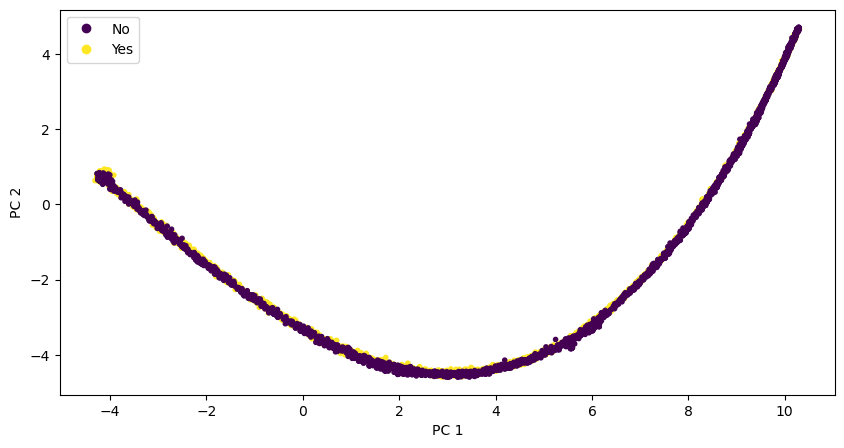

In [8]:
visualize_2pcs(X_train_pca, y_train)

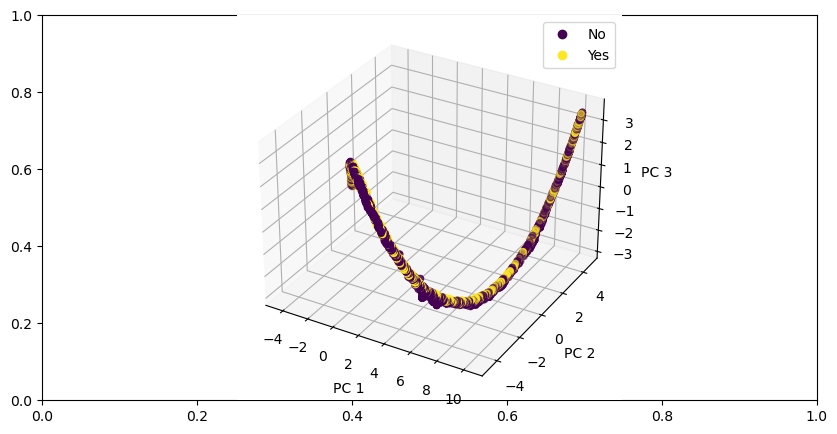

In [9]:
visualize_3pcs(X_train_pca, y_train)

Evaluation on full data

In [11]:
train_predict(X_train, y_train, X_test, y_test)

,acc,recall,precision,f1
lr,0.745158,0.903729,0.690066,0.782576
svc,0.744278,0.927147,0.682631,0.786318
xgb,0.745599,0.883781,0.696514,0.779052


Evaluation on reduced data

In [12]:
X_test_pca = pca.transform(X_test)
train_predict(X_train_pca, y_train, X_test_pca, y_test)

,acc,recall,precision,f1
lr,0.626761,0.581093,0.647343,0.612431
svc,0.628081,0.570685,0.652778,0.608977
xgb,0.709067,0.870772,0.662269,0.752342


### DNA - Get Data and Learners

In [10]:
X_train, y_train = dna_data.X_train, dna_data.y_train 
X_test, y_test = dna_data.X_test, dna_data.y_test

dna_learner = Learner(X_train, y_train, X_test, y_test, ohe=True, pca=False)
dna_learner_pca = Learner(X_train, y_train, X_test, y_test, ohe=True, pca=True)

### DNA - Grid Search (Supervised Learning)

In [ ]:
#hide_output

_, _ = dna_learner.train()

Starting grid search for LogisticRegression
Fitting 5 folds for each of 45 candidates, totalling 225 fits


/home/vinod/anaconda3/envs/peptide2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/vinod/anaconda3/envs/peptide2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

Starting grid search for LinearSVC
Fitting 5 folds for each of 30 candidates, totalling 150 fits


/home/vinod/anaconda3/envs/peptide2/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide2/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide2/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide2/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide2/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide2

In [ ]:
#hide_output

_, _ = dna_learner_pca.train()

Starting grid search for LogisticRegression
Fitting 5 folds for each of 45 candidates, totalling 225 fits


### DNA - Label Spreading (Semi-Supervised Learning)

In [13]:
dna_learner_pca.run_label_spreading()

              precision    recall  f1-score   support

           0       0.76      0.54      0.63      1119
           1       0.65      0.83      0.73      1153

    accuracy                           0.69      2272
   macro avg       0.70      0.69      0.68      2272
weighted avg       0.70      0.69      0.68      2272



### DNA - Prediction Results

On full dataset.

In [17]:
dna_learner.predict()

,best_params,accuracy,recall,precision,f1
LogisticRegression,NaN,NaN,NaN,NaN,NaN
LinearSVC,NaN,NaN,NaN,NaN,NaN
XGBClassifier,NaN,NaN,NaN,NaN,NaN
LabelSpreading,NaN,NaN,NaN,NaN,NaN


On dim reduced dataset.

In [14]:
dna_learner_pca.predict()

,best_params,accuracy,recall,precision,f1
LogisticRegression,"{'classifier': LogisticRegression(C=10.0, max_...",0.636004,0.592368,0.656731,0.622891
LinearSVC,"{'classifier': LinearSVC(C=100.0, loss='hinge'...",0.631162,0.55941,0.661538,0.606203
XGBClassifier,"{'classifier': XGBClassifier(base_score=None, ...",0.729754,0.923677,0.66939,0.776239
LabelSpreading,"{'alpha': 0.01, 'gamma': 20, 'kernel': 'knn', ...",0.68794,0.832611,0.650407,0.730316


Save results.

In [15]:
dna_learner.predict_results.to_csv(f'{EXPERIMENT_STORE}/dna_learner.csv')
dna_learner_pca.predict_results.to_csv(f'{EXPERIMENT_STORE}/dna_learner_pca.csv')

### DNA - KMeans Clustering (Unsupervised Learning)

n_clusters: 2 -- avg silhouette score: 0.5369660356703838
n_clusters: 3 -- avg silhouette score: 0.48462148945643424
n_clusters: 4 -- avg silhouette score: 0.44412580446338357
n_clusters: 5 -- avg silhouette score: 0.41710480059912824
n_clusters: 6 -- avg silhouette score: 0.37766555733696733
n_clusters: 7 -- avg silhouette score: 0.36110374551521757
n_clusters: 8 -- avg silhouette score: 0.3613070340377841
n_clusters: 9 -- avg silhouette score: 0.3222949420547576
n_clusters: 10 -- avg silhouette score: 0.15234892386138005


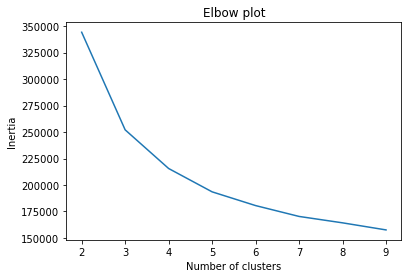

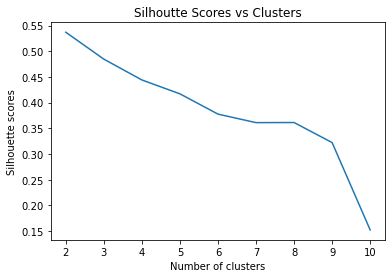

In [ ]:
X_pca = dna_learner_pca.pick_k()

Cluster counts: Counter({1: 9391, 3: 1320, 2: 1254, 6: 1211, 0: 1209, 4: 1112, 5: 964})


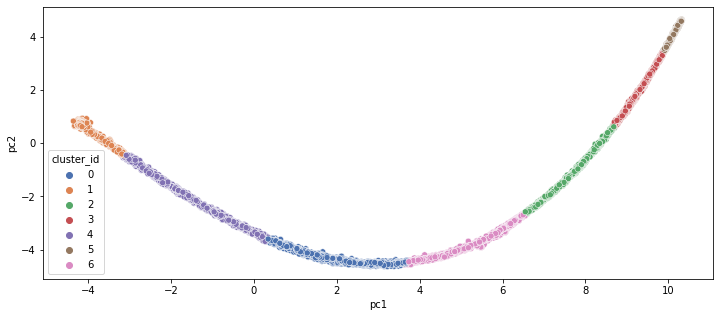

In [ ]:
dna_learner_pca.analyze_clusters(X_pca, k=7)

## Export -

In [1]:
# hide
from nbdev.export import *

notebook2script()


Converted 00_basics.ipynb.
Converted 01_data.ipynb.
Converted 02_learn.ipynb.
Converted 03_onehot.ipynb.
Converted 04_lstm.ipynb.
Converted 05_transformer.ipynb.
Converted 99_utils.ipynb.
Converted index.ipynb.
